In [70]:
import numpy as np
import matplotlib.pyplot as plt

# ME 565, 02/03/2023

We are looking to numerically solve the 1D Poisson equation $u_{xx} = f(x)$ in three situations: 

Case 1. $f(x) = 0$ (Laplace's equation) with Dirichlet boundary conditions $u(0) = -2$, $u(1) = 1$ 

Case 2. $f(x) = 0$ (Laplace's equation) with mixed boundary conditions $u(0) = 1$, $u_x(1) = -1$ 

Case 3. $f(x) = x e^x$ with homogeneous Dirichlet boundary conditions $u(0) = 0$, $u(1) = 0$

In [76]:
# First, set up spatial grid 

N = 11                      # number of grid points 
x1 = 0                      # left boundary
xN = 1                      # right boundary
D = xN - x1                 # length of domain
x = np.linspace(x1,xN,N)    # spatial grid, N evenly spaced points
h = x[1]-x[0]               # grid spacing
display(x)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Recall that second derivative of $u(x)$ can be approximated using central differences: 

$u_xx(x_j) \approx \frac{1}{h^2} \big( u(x_{j-1}) - 2 u(x_j) + u(x_{j+1})\big)$

In matrix form, the differential that takes the second derivative of $u(x)$ numerically sing central differences reads 

$L = \frac{1}{h^2} \begin{pmatrix}-2 & 1 & 0 & \dots & 0 & 0 & 0 \\
1 & -2 & 1 & \dots & 0 & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & 1 & -2 & 1 \\
0 & 0 & 0 & \dots & 0 & 1 & -2  \end{pmatrix} \in \mathbb{R}^{(N-2) \times (N-2)} $ 

with $u_{xx}(\mathbf{x}) \approx Lu(\mathbf{x})$ 

In [77]:
# Second, set up the matrix A, the differntial operator that takes the second derivative of solution u 

L = np.diag(-2*np.ones(N-2)) + np.diag(np.ones(N-3),1) + np.diag(np.ones(N-3),-1) # second order difference operator (before scaling)
display(L)
L = L/(h**2) # scale by grid spacing h^2

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

### Case 1. 
$f(x) = 0$ (Laplace's equation) with Dirichlet boundary conditions $u(0) = -2$, $u(1) = 1$ 

exact solution $u(x) = 3x -2$

Text(0.5, 1.0, 'Solution to Laplace equation in 1D with Dirichlet boundary conditions')

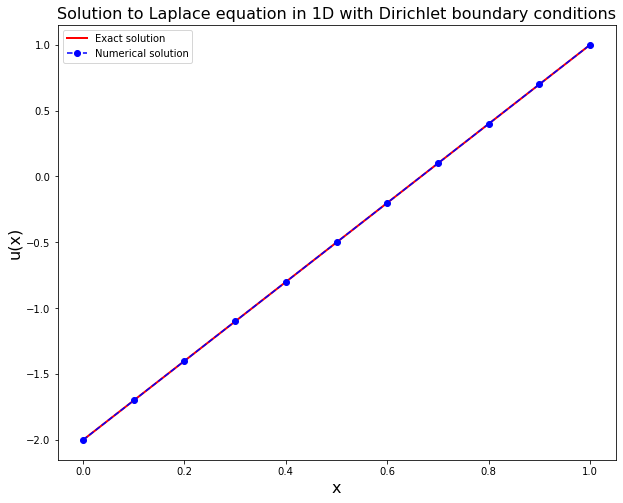

In [78]:
# Impose boundary conditions: u(0) = -2,  u(1) = 1

a = -2                   # boundary condition at x=0
b = 1                    # boundary condition at x=1
f = np.zeros(N-2)        # right hand side of Poisson equation 
f[0] = -a/h**2           # imposing left boundary condition
f[-1] = -b/h**2          # imposing right boundary condition

# Solve the linear system Lu = f

u = np.linalg.solve(L,f) # solve the linear system

# Plot the solution
u_full = np.concatenate(([a],u,[b])) # add boundary conditions to solution
u_exact = lambda x:((b-a)/D)*x + a   # exact solution

plt.figure(figsize=(10,8))
plt.plot(x,u_exact(x),'-',color='red',linewidth=2,label='Exact solution')
plt.plot(x,u_full,'o--',color='blue', label='Numerical solution')
plt.xlabel('x',fontsize=16)
plt.ylabel('u(x)',fontsize=16)
plt.legend()
plt.title('Solution to Laplace equation in 1D with Dirichlet boundary conditions',fontsize=16)


### Case 2. 
$f(x) = 0$ (Laplace's equation) with mixed boundary conditions $u(0) = 1$, $u_x(1) = -1$ 

exact solution $u(x) = -x + 1$


Text(0.5, 1.0, 'Solution to Laplace equation in 1D with mixed boundary conditions')

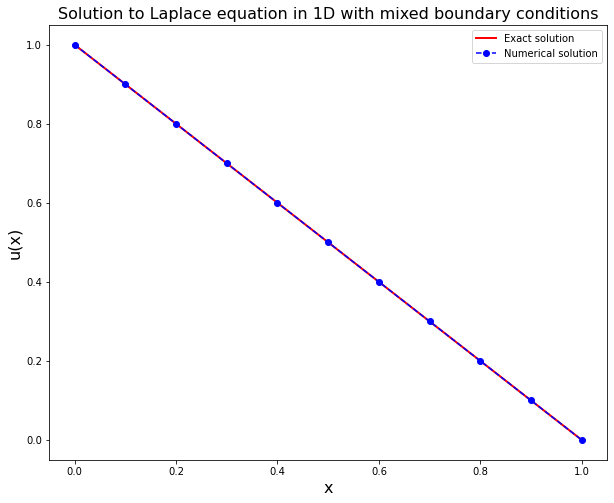

In [79]:
# Impose boundary conditions u(0) = 1, u'(1) = 0 

a2 = 1                     # Dirichlet boundary condition at x=0
b2 = -1                      # Neumann boundary condition at x=1
f2 = np.zeros(N-2)          # right hand side of Poisson equation
f2[0] = -a2/h**2            # imposing left boundary condition
f2[-1] = -b2/h              # imposing right boundary condition
L2 = L.copy()               
L2[-1,-1] = -1/h**2         # add Neumann boundary condition to L

# Solve the linear system Lu = f

u = np.linalg.solve(L2,f2) # solve the linear system

# Plot the solution
u_full = np.concatenate(([a2],u,[b2*x[-1]+a2])) # add boundary conditions to solution
u_exact = lambda x:b2*x + a2   # exact solution

plt.figure(figsize=(10,8))
plt.plot(x,u_exact(x),'-',color='red',linewidth=2,label='Exact solution')
plt.plot(x,u_full,'o--',color='blue', label='Numerical solution')
plt.xlabel('x',fontsize=16)
plt.ylabel('u(x)',fontsize=16)
plt.legend()
plt.title('Solution to Laplace equation in 1D with mixed boundary conditions',fontsize=16)



### Case 3. 
$f(x) = x e^x$ with homogeneous Dirichlet boundary conditions $u(0) = 0$, $u(1) = 0$

Exact solution: $u(x) = (e-2) x + 2 + e^x(x-2)$

Text(0.5, 1.0, 'Solution to Laplace equation in 1D with mixed boundary conditions')

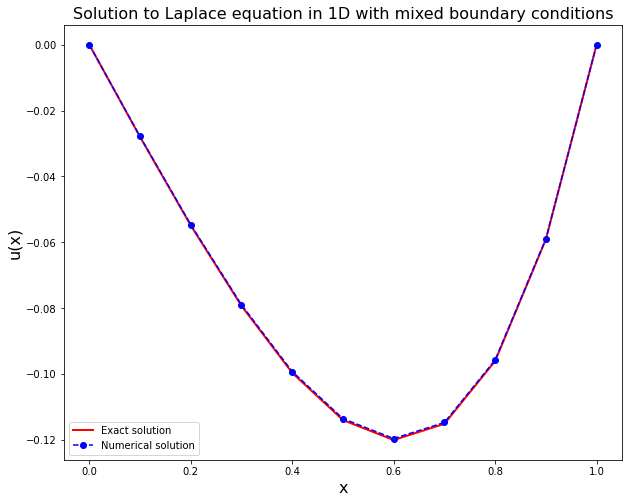

In [80]:
# Impose boundary conditions u(0) = 1, u'(1) = 0 

a3 = 0 # left boundary condition
b3 = 0 # right boundary condition 
f3 = np.multiply(x[1:N-1],np.exp(x[1:N-1]))          # right hand side of Poisson equation

# Solve the linear system Lu = f

u = np.linalg.solve(L,f3) # solve the linear system

# Plot the solution
u_full = np.concatenate(([a3],u,[b3])) # add boundary conditions to solution
u_exact = lambda x: ((b3 - a3 - 2 - (D - 2)*np.exp(D))/D)*x + 2 + a3 + np.multiply(np.exp(x),x-2)   # exact solution

plt.figure(figsize=(10,8))
plt.plot(x,u_exact(x),'-',color='red',linewidth=2,label='Exact solution')
plt.plot(x,u_full,'o--',color='blue', label='Numerical solution')
plt.xlabel('x',fontsize=16)
plt.ylabel('u(x)',fontsize=16)
plt.legend()
plt.title('Solution to Laplace equation in 1D with mixed boundary conditions',fontsize=16)
